In [27]:
import pandas as pd
# from plotnine import *
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from io import StringIO
from IPython.display import display, HTML
import base64


In [1]:
def plot_SCI_sparkline(df, SCI, rolling_avg=None):
    '''plot a sparkline for an SCI
    
    
    '''
    daily_ts = doc_df[doc_df['SCI']==SCI].resample('D')['inmate_positive_D'].sum()
    
    if rolling_avg:
        daily_ts=daily_ts.rolling(rolling_avg).mean()
    
    start=daily_ts.index.min().strftime('%b %d')
    end=daily_ts.index.max().strftime('%b %d')
    
    xmax = daily_ts.idxmax()
    ymax = daily_ts.max()
    
    if rolling_avg:
        ymax_str = f'{ymax:0.1f}'
    else:
        ymax_str = str(round(ymax))

    
    fig,ax=plt.subplots(figsize=(4,0.4))
    sci_plot= daily_ts.plot(ax=ax)
    my_xticks = ax.get_xticks()
    
    #sci_plot.set_axis_off()
    sci_plot.set_frame_on(False)
    sci_plot.get_yaxis().set_visible(False)
    sci_plot.get_xaxis().set_visible(True)
    
    sci_plot.set_xticks([my_xticks[0], my_xticks[-1]])
    sci_plot.set_xticklabels([start, end])
    sci_plot.xaxis.set_ticks_position('none') 
    sci_plot.set_xlabel("")
    sci_plot.annotate(ymax_str, (xmax,ymax), color='red')
    
    sci_plot.axes.set_xlim(right=daily_ts.index.max()+timedelta(days=2))
    
#     plt.savefig(f'../assets/img/table_rolling_cases_figs/{SCI}_rolling_avg.svg',bbox_inches="tight")

In [4]:
doc_df = pd.read_csv('../data/latest_data/PA_DOC_testing_data.csv', 
                     parse_dates=True,
                     index_col='date')

In [5]:
most_recent = doc_df.groupby('SCI').last()

most_recent['inmate_tests'] = most_recent['inmate_positive'] + most_recent['inmate_negative'] + most_recent['inmate_pending']
most_recent['inmate_current_cases'] = most_recent['inmate_positive'] - most_recent['inmate_recovered']
most_recent['inmate_current_pr'] = most_recent['inmate_positive_D'] / (most_recent['inmate_negative_D'] + most_recent['inmate_positive_D'])

most_recent = most_recent.reset_index()
most_recent = most_recent[['inmate_tests','inmate_current_cases','inmate_death','SCI']]
most_recent = most_recent.fillna(0)
most_recent[['inmate_tests','inmate_current_cases','inmate_death']] = most_recent[['inmate_tests','inmate_current_cases','inmate_death']].astype(int)

bottom_row = most_recent.iloc[:,:-1].sum(0)
bottom_row['SCI'] = "TOTAL"
most_recent = pd.concat([most_recent,pd.DataFrame(bottom_row).T])

most_recent['inmate_tests'] = most_recent['inmate_tests'].apply(lambda x:'{0:,d}'.format(x))
most_recent['inmate_current_cases'] = most_recent['inmate_current_cases'].apply(lambda x:'{0:,d}'.format(x))
most_recent['inmate_death'] = most_recent['inmate_death'].apply(lambda x:'{0:,d}'.format(x))

ValueError: NaTType does not support strftime

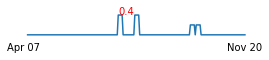

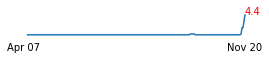

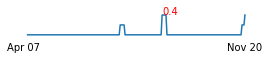

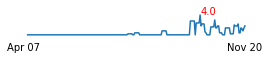

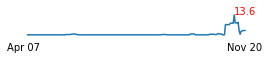

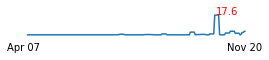

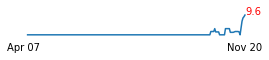

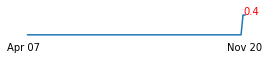

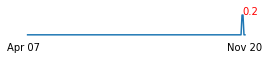

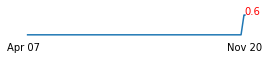

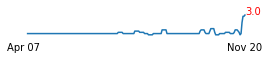

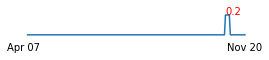

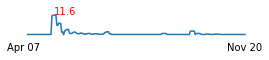

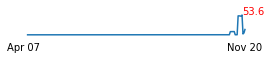

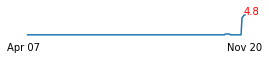

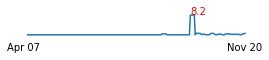

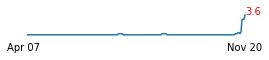

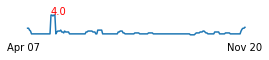

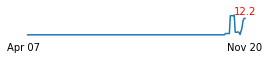

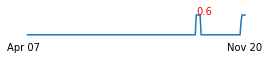

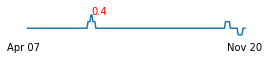

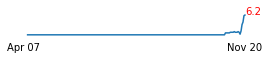

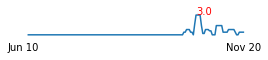

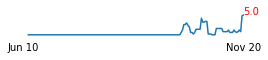

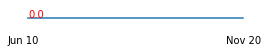

In [10]:
for sci in pd.unique(most_recent.SCI):
    plot_SCI_sparkline(doc_df,sci,5)

In [59]:
def sparkline(data, figsize=(4, 0.25), **kwags):
    """
    Returns a HTML image tag containing a base64 encoded sparkline style plot
    """
    data = list(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    
    img = StringIO()
    plt.savefig(img,format='svg')
    img.seek(0)
    plt.close()
    return img
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.getvalue()))

In [25]:
doc_df.loc[doc_df.SCI == "Laurel Highlands"]['inmate_positive_D'].fillna(0).values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,  43.,   1.,   0., 256.,   0.,
        -4.,  16.,   0.,  14.,  46.])

In [60]:
a = sparkline(doc_df.loc[doc_df.SCI == "Laurel Highlands"]['inmate_positive_D'].fillna(0).values)

In [61]:
'<img src="data:image/png;base64,{}"/>'.format(base64.b64decode(a.read()))

'<img src="data:image/png;base64,b\'\\xc6ioz\\xbb"\\xa2}tzw(v)\\xe0\\xba\\xd7\\xfc\\xb2\\xd6\\xa7u\\xa9h\\x9d\\xe9\\xe8\\x0c\\xe0\\x93`\\xf1,\\xbe\\x03\\xd4\\x04\\xb2\\x02\\xff\\xf5\\xb7\\x0b\\xff\\xc3L4\\x95\\x1b]\\x7f\\xfcCa\\xb6\\xda\\x7f\\xff\\x0c0\\xc3z+\\x83\\xf1\\xabj\\x98br\\xcf\\xd2To\\xf5\\xd7\\xf0\\xd3\\x0f\\xfb/\\x83]]\\xb5\\xd0\\xaby\\xab^w\\x08\\xad\\x86f\\xad\\xa6Z-\\x96&\\xe1\\xb6\\xdal\\xff\\xf9\\x9a\\xb6\\x99h\\xb6X\\x9b\\xa2\\xb8?\\xb2\\xf8!z(!\\xb7_)\\xb6\\xf7\\xab\\xb2*\\\'\\xd7[\\xe2{\\x00h\\xc7M6\\xf3\\xcd|\\xc2\\\'m\\x87o<\\xa6\\xdcf\\x96{\'"/>'

In [93]:

most_recent.to_csv('../_data/most_recent_inmateData.csv')